### Zadanie1: Czy jest możliwe żeby dwie pierwsze komponenty objaśniały 100% wariancji danych 50D? Jeśli nie - udowodnij, jeśli tak - podaj przykład.

Tak, to jest możliwe, ale nie jest to typową sytuacją, bo oznacza że pierwsze dwa komponenty są o wiele bardziej istotne, niż reszta komponent (zawierają o wiele więcej danych). Możliwe, że dane potrzebują doatkowo transformacji/standaryzacji.

https://towardsdatascience.com/understanding-pca-fae3e243731d

https://www.biostars.org/p/9506404/

### Zadanie2: Rozważ dane iris. Dokonaj standaryzacji a następnie przeprowadź algorytm PCA. Która z cech wydaje się najistoniejsza? Ile komponentów wystarczająco dobrze opisuje te dane? Skomentuj otrzymane wyniki.

In [81]:
from sklearn import datasets

iris = datasets.load_iris()

print(iris.data.shape)

(150, 4)


In [82]:
X = iris.data
y = iris.target

In [83]:
# standaryzacja

from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()

X_std = stdsc.fit_transform(X)

In [84]:
pca = PCA(n_components = 3) #setosa, Versicolor, virginica 
X_pca = pca.fit_transform(X_std)

pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922])

In [85]:
# dwie pierwsze komponenty dobrze opisują dane 

sum(pca.explained_variance_ratio_[:2])

0.9581320720000165

In [86]:
# wydaje mi sie ze najistotniejszą cechą jest sepal length 

iris.feature_names, pca.components_

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
        [ 0.37741762,  0.92329566,  0.02449161,  0.06694199],
        [-0.71956635,  0.24438178,  0.14212637,  0.63427274]]))

In [87]:
from sklearn.decomposition import PCA

pca = PCA(2)
iris2d = pca.fit_transform(X_std.data) #z 4 schodzimy na 2 wartosci
print(iris2d.data.shape)

(150, 2)


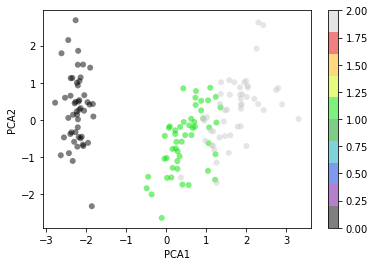

In [88]:
import matplotlib.pyplot as plt

plt.scatter(iris2d[:,0], iris2d[:,1],
            c = iris.target, edgecolor = "none", alpha = 0.5,
            cmap = plt.cm.get_cmap('nipy_spectral',10))

plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.colorbar()
plt.show()

### Zadanie3: Rozważ jeszcze raz dane dotyczące twarzy różnych osób (fetch_lw_people) rozważane podczas ćwiczenia z SVM. Zastosuj podobnie jak wtedy PCA ze 150 komponentnami. Jaki procent wariancji opisują te komponenty? Narsuj kilka początkowych komponentów (wektory własne); oczywiście podobnie jak obrazy są to wektory 64⋅47 wymiarowe - przed narysowaniem należy jeszcze zastosować metodę reshape. Zastanów się nad ich interpretacją.

In [89]:
from sklearn.datasets import fetch_lfw_people

In [90]:
faces = fetch_lfw_people(min_faces_per_person = 60)
print(faces.target_names) #jakie osoby tam są?
print()
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']

(1348, 62, 47)


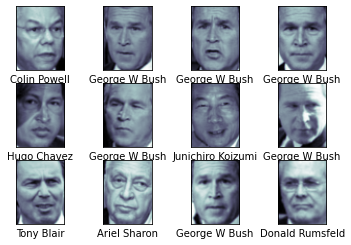

In [91]:
fig, ax = plt.subplots(3, 4)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap = "bone")
    axi.set(xticks = [], yticks = [],
           xlabel = faces.target_names[faces.target[i]])

In [92]:
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size=0.3, random_state=42)

pca = RandomizedPCA(n_components = 150, whiten = True, random_state = 42)

X_train_pca = pca.fit_transform(X_train)


In [93]:
# procent wariancji który opisują komponenty
sum(pca.explained_variance_ratio_) 

0.9512277107569389

In [94]:
print(pca.components_[:5]) #pierwsze 5 komponenty

[[-0.0054959  -0.00573729 -0.00657091 ... -0.01168544 -0.01099299
  -0.01022015]
 [ 0.01618942  0.01502932  0.01446368 ... -0.03494519 -0.03505453
  -0.0349855 ]
 [-0.01390793 -0.01213533 -0.01053417 ... -0.03346214 -0.03014663
  -0.02922115]
 [-0.03715683 -0.03932079 -0.04079046 ... -0.0242856  -0.02188703
  -0.01824631]
 [ 0.00979321  0.00941408  0.00852967 ... -0.10062685 -0.09124878
  -0.07932918]]


In [114]:
def PlotComponents(n):
    return plt.imshow(pca.components_[n].reshape(62,47))

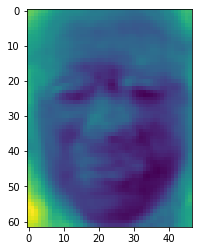

In [116]:
PlotComponents(0)

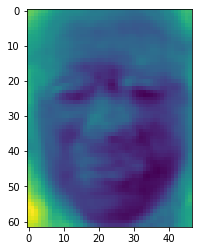

In [117]:
PlotComponents(1)

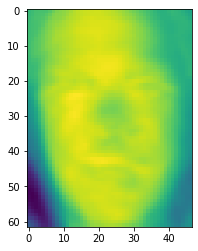

In [118]:
PlotComponents(2)

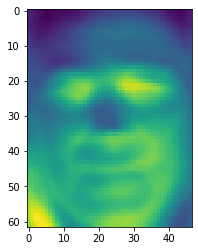

In [119]:
PlotComponents(3)

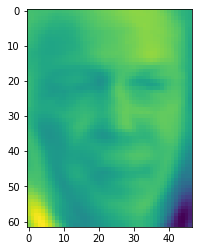

In [120]:
PlotComponents(4)

### Zadanie4: Zauważ, że wykresy te różnią się zakresem wartości - czy to zrozumiałe?

Wykresy się różnią zakresem wartości, ponieważ nie możemy odzyskać dokładnie takich współczynników, jakie zastosowano (nie wiadomo czy to były współczynniki początkowo takie, czy po sumowaniu sygnałów).